# Imports

In [153]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
! pip install folium
import folium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data loading

In [154]:
with zipfile.ZipFile('bulidata.csv.zip', 'r') as file:
    file.extractall('')
    
df = pd.read_csv('bulidata.csv')
df

,Unnamed: 0,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,FINISHED,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,...,HOME_ICON,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,AWAY_ICON,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,München,NaN,1. Spieltag,1,...,https://i.imgur.com/jJEsJrj.png,87,Borussia Mönchengladbach,Gladbach,https://i.imgur.com/KSIk0Eu.png,3,0,0.0,1.0,0.0
1,1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Köln,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/thum...,81,1. FSV Mainz 05,Mainz,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0
2,2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Duisburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/c/c8...,16,VfB Stuttgart,Stuttgart,https://i.imgur.com/v0tkpNx.png,1,1,1.0,0.0,0.0
3,3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Hamburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/commons...,79,1. FC Nürnberg,Nürnberg,https://upload.wikimedia.org/wikipedia/commons...,3,0,0.0,1.0,0.0
4,4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Wolfsburg,NaN,1. Spieltag,1,...,https://i.imgur.com/ucqKV4B.png,7,Borussia Dortmund,BVB,https://upload.wikimedia.org/wikipedia/commons...,2,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,5505,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Köln,NaN,34. Spieltag,34,...,https://upload.wikimedia.org/wikipedia/en/thum...,40,FC Bayern München,Bayern,https://i.imgur.com/jJEsJrj.png,1,2,0.0,0.0,1.0
5504,5506,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Leipzig,NaN,34. Spieltag,34,...,https://i.imgur.com/Rpwsjz1.png,9,FC Schalke 04,Schalke,https://upload.wikimedia.org/wikipedia/commons...,4,2,0.0,1.0,0.0
5505,5507,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Stuttgart,NaN,34. Spieltag,34,...,https://i.imgur.com/v0tkpNx.png,175,TSG 1899 Hoffenheim,Hoffenheim,https://i.imgur.com/gF0PfEl.png,1,1,1.0,0.0,0.0
5506,5508,2023-05-27 15:30:00,1. Fußball-Bundesliga 2022/2023,2022,bl1,True,Berlin,NaN,34. Spieltag,34,...,https://assets.dfb.de/uploads/000/018/232/smal...,134,Werder Bremen,Bremen,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0


# Preliminary analysis

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5508 non-null   int64  
 1   MATCH_DATE      5508 non-null   object 
 2   LEAGUE_NAME     5508 non-null   object 
 3   SEASON          5508 non-null   int64  
 4   LEAGUE          5508 non-null   object 
 5   FINISHED        5508 non-null   bool   
 6   LOCATION        5508 non-null   object 
 7   VIEWER          1682 non-null   float64
 8   MATCHDAY        5508 non-null   object 
 9   MATCHDAY_NR     5508 non-null   int64  
 10  HOME_TEAM_ID    5508 non-null   int64  
 11  HOME_TEAM_NAME  5508 non-null   object 
 12  HOME_TEAM       5508 non-null   object 
 13  HOME_ICON       5508 non-null   object 
 14  AWAY_TEAM_ID    5508 non-null   int64  
 15  AWAY_TEAM_NAME  5508 non-null   object 
 16  AWAY_TEAM       5474 non-null   object 
 17  AWAY_ICON       5508 non-null   o

In [156]:
df.isnull().any()

Unnamed: 0        False
MATCH_DATE        False
LEAGUE_NAME       False
SEASON            False
LEAGUE            False
FINISHED          False
LOCATION          False
VIEWER             True
MATCHDAY          False
MATCHDAY_NR       False
HOME_TEAM_ID      False
HOME_TEAM_NAME    False
HOME_TEAM         False
HOME_ICON         False
AWAY_TEAM_ID      False
AWAY_TEAM_NAME    False
AWAY_TEAM          True
AWAY_ICON         False
GOALS_HOME        False
GOALS_AWAY        False
DRAW              False
WIN_HOME          False
WIN_AWAY          False
dtype: bool

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5508.0,2755.055556,1590.765865,0.0,1378.75,2755.5,4132.25,5509.0
SEASON,5508.0,2013.500000,5.188598,2005.0,2009.00,2013.5,2018.00,2022.0
VIEWER,1682.0,41841.023781,18057.421146,0.0,28176.25,41000.0,52121.00,81365.0
MATCHDAY_NR,5508.0,17.500000,9.811599,1.0,9.00,17.5,26.00,34.0
HOME_TEAM_ID,5508.0,109.762346,231.486413,6.0,40.00,81.0,112.00,1635.0
AWAY_TEAM_ID,5508.0,109.762346,231.486413,6.0,40.00,81.0,112.00,1635.0
GOALS_HOME,5508.0,1.394336,1.299628,0.0,0.00,1.0,2.00,9.0
GOALS_AWAY,5508.0,1.075527,1.131180,0.0,0.00,1.0,2.00,8.0
DRAW,5508.0,0.290668,0.454112,0.0,0.00,0.0,1.00,1.0
WIN_HOME,5508.0,0.425744,0.494500,0.0,0.00,0.0,1.00,1.0


In [158]:
df.duplicated().sum()

0

# Dataset cleaning

In [159]:
"Converting columns names into lower case."
df.columns = df.columns.str.lower()

"Merging 3 columns with information about winner to 1 single column."
df['match_result'] = df[['draw', 'win_home', 'win_away']].idxmax(axis = 1)

"Converting match_date column to datetime."
df['match_date'] = pd.to_datetime(df['match_date'])

"Creating game_month, game_day and game_hour columns."
df['game_year'] = df['match_date'].dt.year
df['game_month'] = df['match_date'].dt.month_name()
df['game_day'] = df['match_date'].dt.day_name()
df['hour_game'] = df['match_date'].dt.time

"Creating match_result column by draw, win_home an win_away columns."
def change_match_result(result):
    if result == "win_home":
        return "home team"
    elif result == "win_away":
        return "away team"
    else:
        return "draw"
    
df['winner'] = df['match_result'].apply(change_match_result)

"Changing season column to added second pard of information about season (second year the season is played)."
df['season'] = df['season'].apply(lambda x: str(x) + '/' + str(x + 1))

"Removing columns not relevant to the analysis."
df.drop(columns = ['unnamed: 0', 'league_name', 'match_date', 'matchday', 'match_result', 'league', 'finished', 'home_icon',
                   'away_icon', 'home_team', 'away_team', 'home_team_id', 'away_team_id'], inplace = True)

df

,season,location,viewer,matchday_nr,home_team_name,away_team_name,goals_home,goals_away,draw,win_home,win_away,game_year,game_month,game_day,hour_game,winner
0,2005/2006,München,NaN,1,FC Bayern München,Borussia Mönchengladbach,3,0,0.0,1.0,0.0,2005,August,Friday,20:30:00,home team
1,2005/2006,Köln,NaN,1,1. FC Köln,1. FSV Mainz 05,1,0,0.0,1.0,0.0,2005,August,Saturday,15:30:00,home team
2,2005/2006,Duisburg,NaN,1,MSV Duisburg,VfB Stuttgart,1,1,1.0,0.0,0.0,2005,August,Saturday,15:30:00,draw
3,2005/2006,Hamburg,NaN,1,Hamburger SV,1. FC Nürnberg,3,0,0.0,1.0,0.0,2005,August,Saturday,15:30:00,home team
4,2005/2006,Wolfsburg,NaN,1,VfL Wolfsburg,Borussia Dortmund,2,2,1.0,0.0,0.0,2005,August,Saturday,15:30:00,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,2022/2023,Köln,NaN,34,1. FC Köln,FC Bayern München,1,2,0.0,0.0,1.0,2023,May,Saturday,15:30:00,away team
5504,2022/2023,Leipzig,NaN,34,RB Leipzig,FC Schalke 04,4,2,0.0,1.0,0.0,2023,May,Saturday,15:30:00,home team
5505,2022/2023,Stuttgart,NaN,34,VfB Stuttgart,TSG 1899 Hoffenheim,1,1,1.0,0.0,0.0,2023,May,Saturday,15:30:00,draw
5506,2022/2023,Berlin,NaN,34,1. FC Union Berlin,Werder Bremen,1,0,0.0,1.0,0.0,2023,May,Saturday,15:30:00,home team


# Exploratory Data Analysis

### Seasons analysis

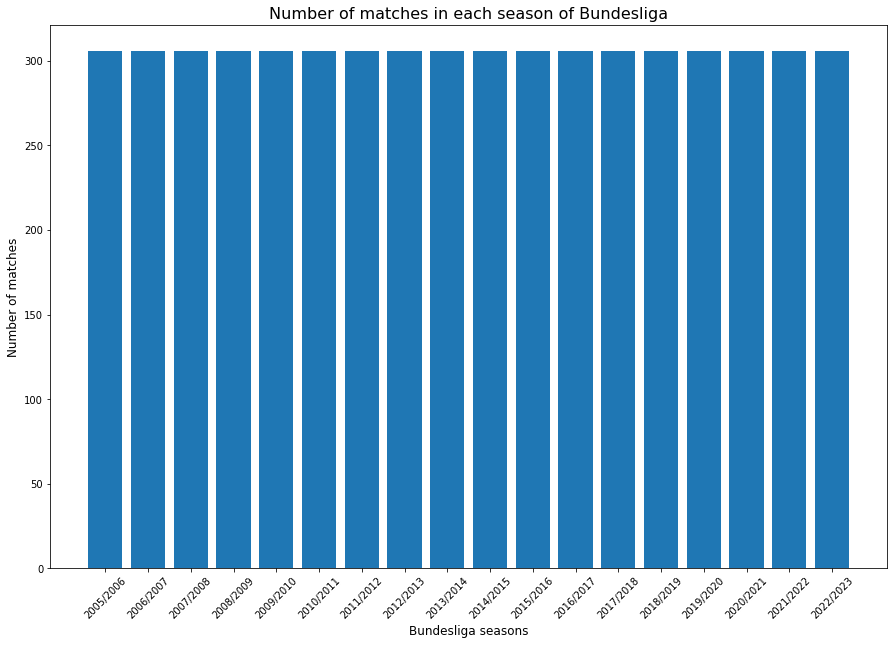

In [160]:
height = df['season'].value_counts()
bars = ['2005/2006', '2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015',
        '2015/2016', '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023']
y_pos = np.arange(len(height))

plt.figure(figsize = (15, 10))

plt.bar(x = y_pos, height = height)
plt.xticks(y_pos, labels = bars, rotation = 45)

plt.xlabel('Bundesliga seasons', fontsize = 12)
plt.ylabel('Number of matches', fontsize = 12)
plt.title('Number of matches in each season of Bundesliga', fontsize = 16)

plt.show()

* The same number of matches were played each season.
* Acording to the conclusion, 306 matches were played in each season. This can also be seen in the graph. 

### Location analysis

In [161]:
matches_count = df['location'].value_counts().reset_index()
matches_count.columns = ['location', 'matches']
matches_count = matches_count.sort_values(by = 'matches')

In [162]:
map = folium.Map(location = [51.00, 9.00],
                 zoom_start = 6)

folium.Marker([52.5243700, 13.4105300],
              popup = '<b>Berlin (340 matches)<b>').add_to(map)
folium.Marker([48.1374300, 11.5754900],
              popup = '<b>München (306 matches)<b>').add_to(map)
folium.Marker([52.416667, 10.783333],
              popup = '<b>Wolfsburg (306 matches)<b>').add_to(map)
folium.Marker([51.5149400, 7.4660000],
              popup = '<b>Dortmund (306 matches)<b>').add_to(map)
folium.Marker([51.0303000, 6.9843200],
              popup = '<b>Leverkusen (306 matches)<b>').add_to(map)
folium.Marker([51.1853900, 6.4417200],
              popup = '<b>Gladbach (289 matches)<b>').add_to(map)
folium.Marker([53.0751600, 8.8077700],
              popup = '<b>Bremen (289 matches)<b>').add_to(map)
folium.Marker([51.5075000, 7.1228300],
              popup = '<b> Gelsenkirchen (289 matches)<b>').add_to(map)
folium.Marker([50.1155200, 8.6841700],
              popup = '<b>Franfurt (289 matches)<b>').add_to(map)
folium.Marker([49.9841900, 8.2791000],
              popup = '<b>Mainz (272 matches)<b>').add_to(map)
folium.Marker([48.7823200, 9.1770200],
              popup = '<b>Stuttgart (272 matches)<b>').add_to(map)
folium.Marker([49.2529000, 8.8786700],
              popup = '<b>Sinsheim (255 matches)<b>').add_to(map)
folium.Marker([53.5753200, 10.0153400],
              popup = '<b>Hamburg (238 matches)<b>').add_to(map)
folium.Marker([52.3705200, 9.7332200],
              popup = '<b>Hannover (221 matches)<b>').add_to(map)
folium.Marker([47.9959000, 7.8522200],
              popup = '<b>Freiburg (221 matches)<b>').add_to(map)
folium.Marker([50.9333300, 6.9500000],
              popup = '<b>Köln (221 matches)<b>').add_to(map)
folium.Marker([48.3715400, 10.8985100],
              popup = '<b>Augsburg (204 matches)<b>').add_to(map)
folium.Marker([49.4542100, 11.0775200],
              popup = '<b>Nürnberg (153 matches)<b>').add_to(map)
folium.Marker([51.3396200, 12.3712900],
              popup = '<b>Liepzig (119 matches)<b>').add_to(map)
folium.Marker([51.4816500, 7.2164800],
              popup = '<b>Bochum (102 matches)<b>').add_to(map)
folium.Marker([52.0333300, 8.5333300],
              popup = '<b>Bielefeld (102 matches)<b>').add_to(map)
folium.Marker([51.7576900, 14.3288800],
              popup = '<b>Cottbus (51 matches)<b>').add_to(map)
folium.Marker([49.4430000, 7.7716100],
              popup = '<b>Kaiserslautern (51 matches)<b>').add_to(map)
folium.Marker([51.2217200, 6.7761600],
              popup = '<b>Düsseldorf (51 matches)<b>').add_to(map)
folium.Marker([49.0093700, 8.4044400],
              popup = '<b>Karlsruhe (34 matches)<b>').add_to(map)
folium.Marker([51.4324700, 6.7651600],
              popup = '<b>Duisburg (34 matches)<b>').add_to(map)
folium.Marker([49.4759300, 10.9885600],
              popup = '<b>Fürth (34 matches)<b>').add_to(map)
folium.Marker([51.7190500, 8.7543900],
              popup = '<b>Paderborn (34 matches)<b>').add_to(map)
folium.Marker([49.8716700, 8.6502700],
              popup = '<b>Darmstadt (34 matches)<b>').add_to(map)
folium.Marker([48.7650800, 11.4237200],
              popup = '<b>Ingolstadt (34 matches)<b>').add_to(map)
folium.Marker([50.7766400, 6.0834200],
              popup = '<b>Aachen (17 matches)<b>').add_to(map)
folium.Marker([52.2659400, 10.5267300],
              popup = '<b>Braunschweig (17 matches)<b>').add_to(map)
folium.Marker([54.0887000, 12.1404900],
              popup = '<b>Rostock (17 matches)<b>').add_to(map)

map